In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#`1.  What is the overall distribution of passengers across different classes (Pclass)?

In [6]:
titanic['pclass'].unique()

array([3, 1, 2])

In [7]:
titanic['pclass'].value_counts()

,count
pclass,
3,491
1,216
2,184


Text(0.5, 1.0, 'passanger count by pclass')

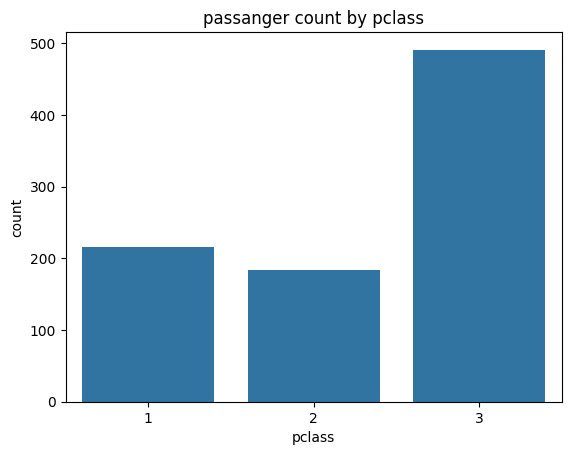

In [8]:
sns.countplot(data=titanic, x = 'pclass')
plt.title('passanger count by pclass')

#2.   How is the age of passengers distributed?

Text(0.5, 1.0, 'age distribution')

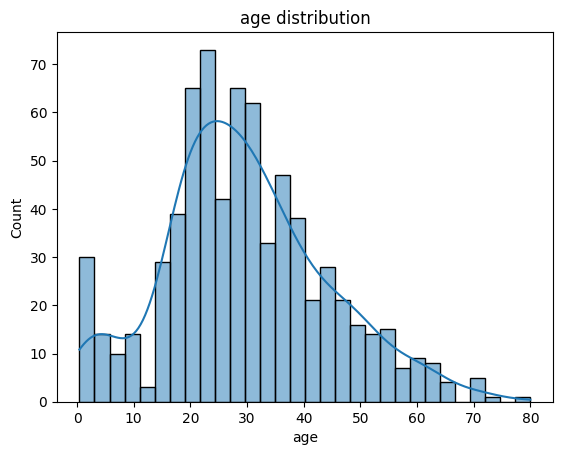

In [9]:
sns.histplot(titanic['age'], kde = True, bins = 30)    #kde = kernel density estimater
plt.title('age distribution')

#3.   What is the distribution of passengers based on Sex?

In [10]:
titanic['sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
titanic['sex'].value_counts()

,count
sex,
male,577
female,314


Text(0.5, 1.0, 'passengers based on gender')

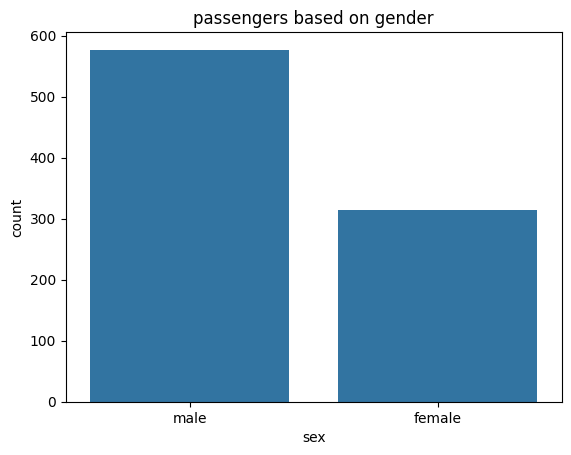

In [12]:
sns.countplot(data = titanic, x= 'sex')
plt.title('passengers based on gender')

#4.   How many passengers embarked from each port (Embarked)

In [13]:
titanic['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:


titanic['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


Text(0.5, 1.0, 'passenger count by embarkation point')

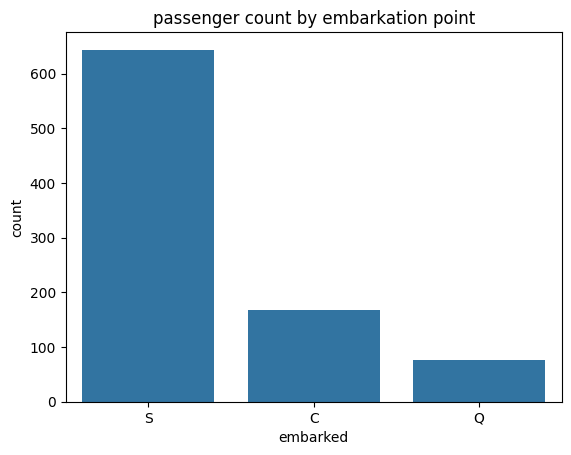

In [15]:

sns.countplot(data = titanic, x= 'embarked')
plt.title('passenger count by embarkation point')

#5.   What is the survival rate overall, and how does it vary by Pclass?

<Axes: xlabel='pclass', ylabel='survived'>

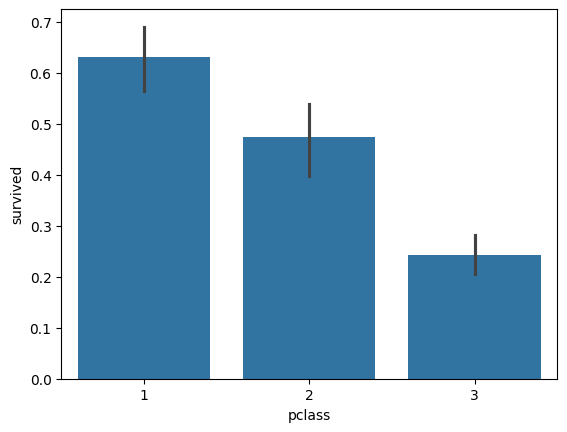

In [16]:
sns.barplot(data = titanic, x= 'pclass', y = 'survived')

In [17]:
overall_survived_rate = titanic['survived'].mean()

In [18]:
print('overall_survived_rate:-', overall_survived_rate)

overall_survived_rate:- 0.3838383838383838


In [19]:
survival_rate_by_pclass = titanic.groupby('pclass')['survived'].mean()

In [20]:
print('survival_rate_by_pclass:-', survival_rate_by_pclass)

survival_rate_by_pclass:- pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


#6.  What is the survival rate for males vs. females?

In [21]:
survival_rate_by_gender = titanic.groupby('sex')['survived'].mean()

In [22]:
print('survival_rate_by_gender:-', survival_rate_by_gender)

survival_rate_by_gender:- sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


<Axes: xlabel='survived', ylabel='Count'>

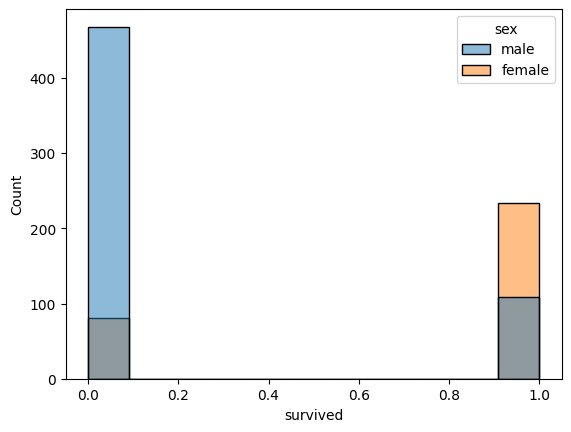

In [23]:
sns.histplot(data = titanic, x= 'survived', hue= 'sex')

#7.  What is the survival rate for passengers from different embarkation points (Embarked)

In [24]:
survival_rate_by_embarked = titanic.groupby('embarked')['survived'].mean()

In [25]:

print('survival_rate_by_embarked:-', survival_rate_by_embarked)

survival_rate_by_embarked:- embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


#8.  How does the survival rate vary across different ticket classes (Pclass)?

In [26]:
survival_rate_by_pclass = titanic.groupby('pclass')['survived'].mean()

In [27]:
print('survival_rate_by_pclass:-', survival_rate_by_pclass)

survival_rate_by_pclass:- pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


#9. Is there any relationship between the number of siblings/spouses aboard (SibSp) and


In [28]:
relationship_bet_sibsp_survived = titanic.groupby('sibsp')['survived'].mean().reset_index()

In [29]:
relationship_bet_sibsp_survived

,sibsp,survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


#10.    How does the number of parents/children aboard (Parch) affect survival?

In [30]:
titanic['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [31]:
titanic['parch'].value_counts()

,count
parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


<Axes: xlabel='parch', ylabel='count'>

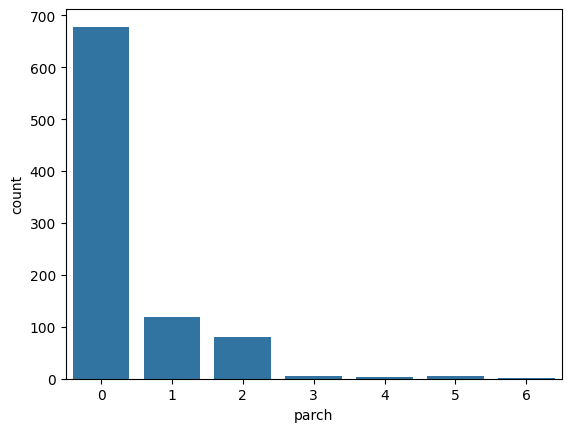

In [32]:
sns.countplot(x= 'parch', data = titanic)

<Axes: xlabel='parch', ylabel='survived'>

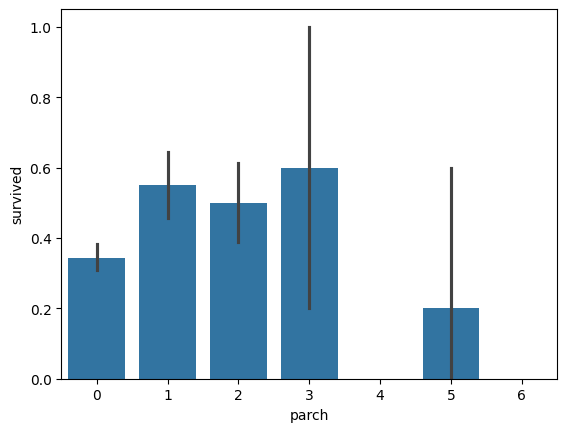

In [33]:
sns.barplot(x= 'parch', y = 'survived', data= titanic)

#11. How does the fare distribution vary across different passenger classes (Pclass)?

<Axes: xlabel='pclass', ylabel='fare'>

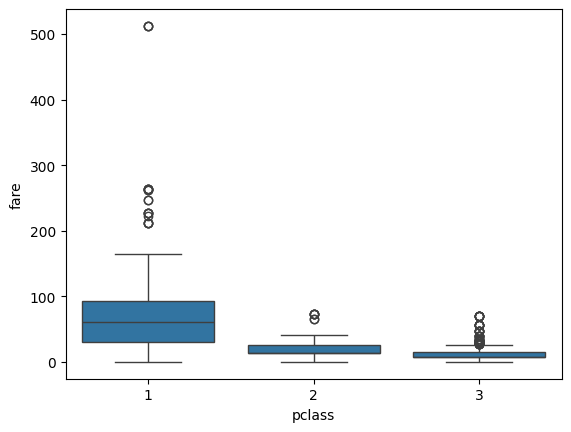

In [34]:
sns.boxplot(x= 'pclass', y = 'fare', data= titanic )

#12.  What is the relationship between age and survival rates?

<Axes: xlabel='survived', ylabel='age'>

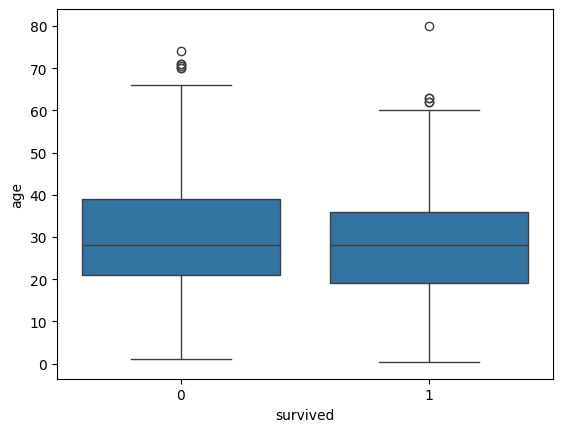

In [35]:
sns.boxplot(x = 'survived', y = 'age', data = titanic)

In [36]:
data_survived = titanic[titanic['survived'] == 1]['age']

In [37]:
data_not_survived = titanic[titanic['survived'] == 0]['age']

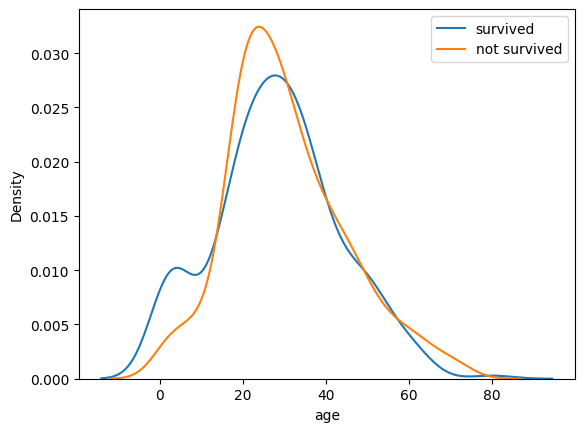

In [38]:
sns.kdeplot(data = data_survived, label = 'survived')
sns.kdeplot(data = data_not_survived, label = 'not survived')
plt.legend()

#13.  . What is the correlation between Fare, Pclass, and survival?

In [39]:
corr_matrix = titanic[['fare', 'pclass', 'survived']].corr()

In [40]:
corr_matrix

,fare,pclass,survived
fare,1.000000,-0.549500,0.257307
pclass,-0.549500,1.000000,-0.338481
survived,0.257307,-0.338481,1.000000


<Axes: >

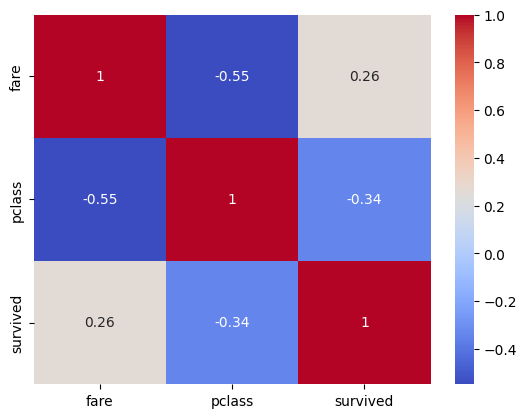

In [41]:
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')

<Axes: xlabel='pclass', ylabel='fare'>

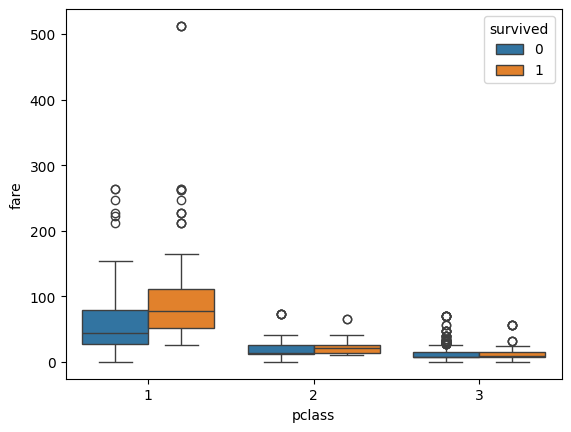

In [42]:
sns.boxplot(x = 'pclass', y = 'fare', hue = 'survived', data = titanic)

#14.  What are the age ranges of survivors vs. non-survivors?

In [43]:
data_survived.describe()

,age
count,290.000000
mean,28.343690
std,14.950952
min,0.420000
25%,19.000000
50%,28.000000
75%,36.000000
max,80.000000


In [44]:
data_not_survived.describe()

,age
count,424.000000
mean,30.626179
std,14.172110
min,1.000000
25%,21.000000
50%,28.000000
75%,39.000000
max,74.000000


#15.  Are younger passengers more likely to survive compared to older passengers?

In [45]:
titanic.head(1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False


In [46]:
bins = [0,12,18,30,50,80]
labels = ['child(0-12)', 'teen(12-18)', 'young adult(19-30)',
         'adult(31-50)', 'old(51-80)']

In [47]:
titanic['age_group'] = pd.cut(titanic['age'], bins = bins, labels = labels)    #cut continuous column (numerical)

In [48]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30)
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50)
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young adult(19-30)
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50)
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult(31-50)


In [49]:
age_group_survival = titanic.groupby('age_group')['survived'].mean()     #.mean means rate

<ipython-input-49-05b7a3077a88>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = titanic.groupby('age_group')['survived'].mean()     #.mean means rate


In [50]:
age_group_survival

,survived
age_group,
child(0-12),0.579710
teen(12-18),0.428571
young adult(19-30),0.355556
adult(31-50),0.423237
old(51-80),0.343750


([0, 1, 2, 3, 4],
 [Text(0, 0, 'child(0-12)'),
  Text(1, 0, 'teen(12-18)'),
  Text(2, 0, 'young adult(19-30)'),
  Text(3, 0, 'adult(31-50)'),
  Text(4, 0, 'old(51-80)')])

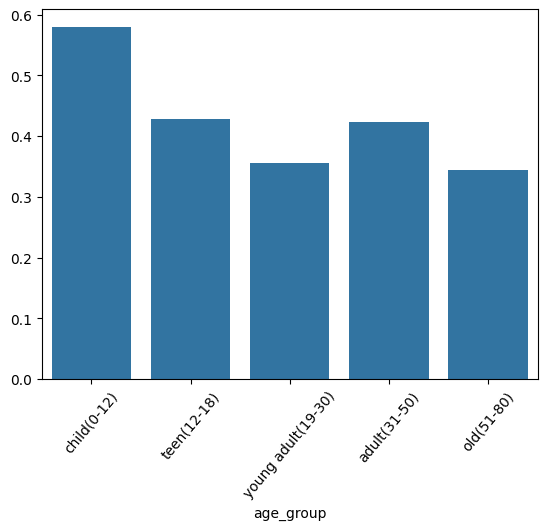

In [51]:
sns.barplot(x = age_group_survival.index, y = age_group_survival.values)
plt.xticks(rotation = 50)

In [52]:
age_group_survival.reset_index()

,age_group,survived
0,child(0-12),0.579710
1,teen(12-18),0.428571
2,young adult(19-30),0.355556
3,adult(31-50),0.423237
4,old(51-80),0.343750


#16. What is the survival rate for families (passengers with SibSp or Parch > 0) vs. solo travelers?

In [53]:
titanic['IsFamily'] = (titanic['sibsp']> 0) | (titanic['parch'] > 0)

In [54]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,IsFamily
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30),True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50),True
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young adult(19-30),False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50),True
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult(31-50),False


In [55]:
survival_rate_family = titanic [titanic['IsFamily']]['survived'].mean()

In [56]:
titanic [titanic['IsFamily']]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,IsFamily
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30),True
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50),True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50),True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,child(0-12),True
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,young adult(19-30),True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1,2,female,28.0,1,0,24.0000,C,Second,woman,False,NaN,Cherbourg,yes,False,young adult(19-30),True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False,old(51-80),True
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,young adult(19-30),True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,adult(31-50),True


In [57]:
survival_rate_family

0.5056497175141242

In [58]:
survival_rate_solo_traveler = titanic[~titanic['IsFamily']]['survived'].mean()

In [59]:
survival_rate_solo_traveler

0.30353817504655495

<Axes: >

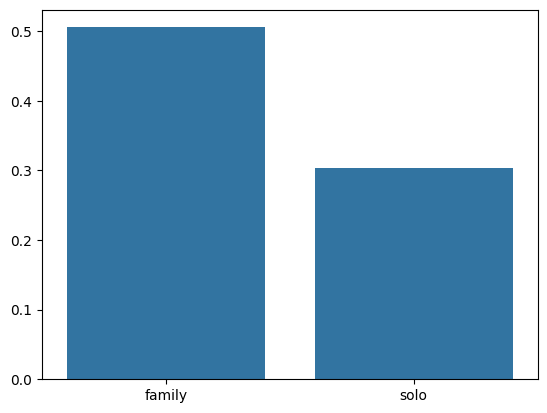

In [60]:
sns.barplot(x = ['family', 'solo'], y= [survival_rate_family,survival_rate_solo_traveler])

#17. What is the distribution of family sizes among passengers, and how does it affect survival?

In [61]:
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']+ 1

In [62]:
titanic['FamilySize']

,FamilySize
0,2
1,2
2,1
3,2
4,1
...,...
886,1
887,1
888,4
889,1


In [63]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,IsFamily,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30),True,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50),True,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young adult(19-30),False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50),True,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult(31-50),False,1


<Axes: xlabel='FamilySize', ylabel='count'>

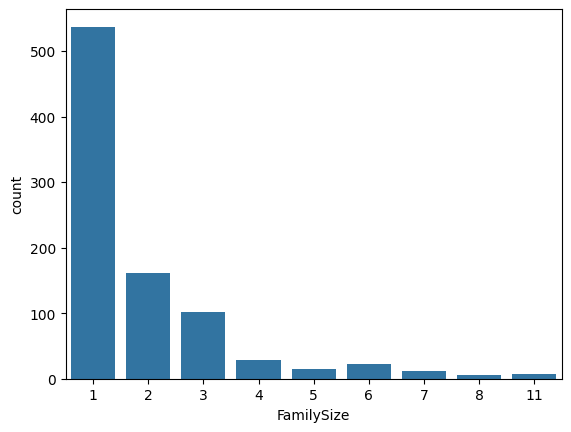

In [64]:
sns.countplot(x = 'FamilySize', data = titanic)

In [65]:
#as i seen in the family size after 8 directly showing 11. so is there data is missing?

In [66]:
#lets check is first

In [67]:
titanic['FamilySize'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [68]:
#as we seen there is no one who travele with their family count 9 and 10
#lets find out the total count of traveles

In [69]:
titanic['FamilySize'].value_counts()

,count
FamilySize,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


<Axes: xlabel='FamilySize', ylabel='survived'>

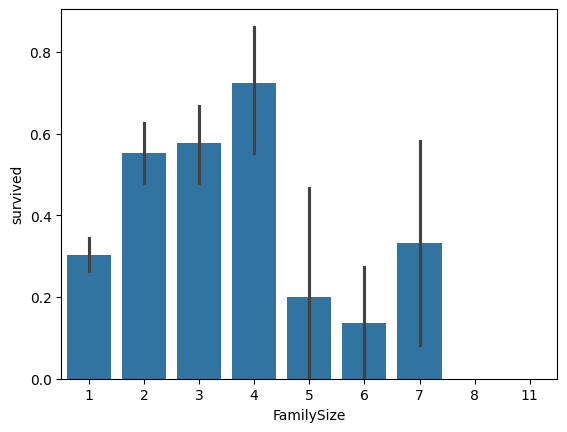

In [70]:
sns.barplot(x = 'FamilySize', y = 'survived', data = titanic)

#18. How does survival differ for passengers who paid exceptionally high fares (Fare outliers)?

In [71]:
titanic['fare'].describe()

,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


<Axes: ylabel='fare'>

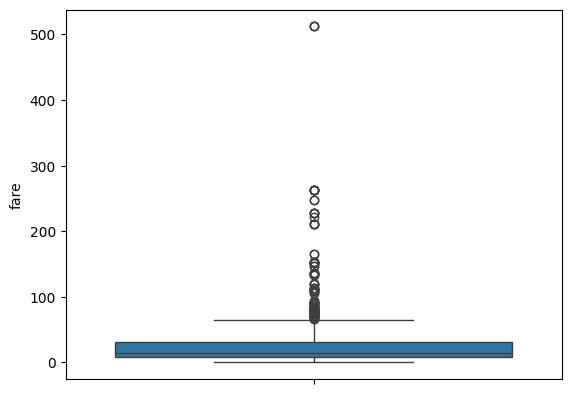

In [72]:
sns.boxplot(titanic['fare'])

In [73]:
#lets find out the IQR

In [74]:
Q1 = titanic['fare'].quantile(0.25)

In [75]:
Q3 = titanic['fare'].quantile(0.75)

In [76]:
IQR = Q3-Q1

In [77]:
lower_bound = Q1 - 1.5 * IQR

upper_bound = Q3 + 1.5 * IQR

In [78]:
lower_bound

-26.724

In [79]:
upper_bound

65.6344

In [80]:
outliers = titanic[titanic['fare'] > upper_bound]

In [81]:
non_outliers = titanic[titanic['fare'] <= upper_bound]

In [82]:
outliers['survived'].value_counts()

,count
survived,
1,79
0,37


In [83]:
non_outliers['survived'].value_counts()

,count
survived,
0,512
1,263


In [84]:
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,IsFamily,FamilySize
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50),True,2
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False,young adult(19-30),True,6
31,1,1,female,NaN,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False,NaN,True,2
34,0,1,male,28.0,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False,young adult(19-30),True,2
52,1,1,female,49.0,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False,adult(31-50),True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False,NaN,True,11
849,1,1,female,NaN,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False,NaN,True,2
856,1,1,female,45.0,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False,adult(31-50),True,3
863,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False,NaN,True,11


In [85]:
non_outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,IsFamily,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30),True,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young adult(19-30),False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50),True,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult(31-50),False,1
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True,NaN,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,young adult(19-30),False,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,young adult(19-30),False,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,NaN,True,4
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,young adult(19-30),False,1


<ipython-input-86-9b954d0368ae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = outliers, x = 'survived', palette = 'Set1')
<ipython-input-86-9b954d0368ae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = non_outliers, x = 'survived', palette= 'Set2')


Text(0, 0.5, 'count')

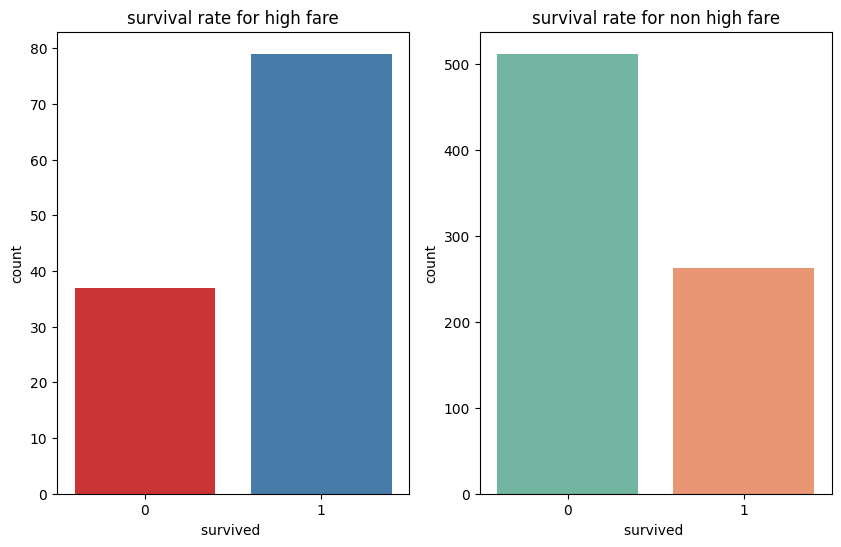

In [86]:
plt.figure(figsize = (10,6))   #at a time two figures can be drawn

plt.subplot(1,2,1)
sns.countplot(data = outliers, x = 'survived', palette = 'Set1')
plt.title("survival rate for high fare")
plt.xlabel("survived ")
plt.ylabel("count")

plt.subplot(1,2,2)
sns.countplot(data = non_outliers, x = 'survived', palette= 'Set2')
plt.title("survival rate for non high fare")
plt.xlabel("survived ")
plt.ylabel("count")


#19. Are there any gender-based differences in survival within each class (Pclass)?

<Axes: xlabel='pclass', ylabel='count'>

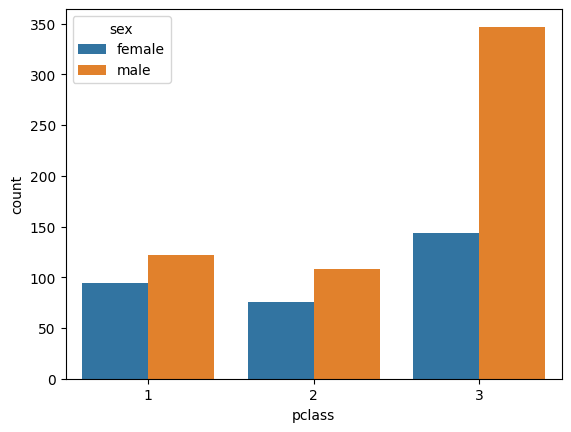

In [87]:
sns.countplot(data = titanic, x= 'pclass', hue = "sex")

In [88]:
survival_rate = titanic.groupby(['pclass', 'sex'])['survived'].mean().reset_index()

In [89]:
survival_rate

,pclass,sex,survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [90]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_group,IsFamily,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,young adult(19-30),True,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,adult(31-50),True,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,young adult(19-30),False,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,adult(31-50),True,2
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,adult(31-50),False,1


#21. . Create a heatmap to visualize the correlation between numeric features?

In [91]:
numerical_features = ['age', 'sibsp', 'parch', 'fare']

In [92]:
titanic_numeric = titanic[numerical_features]

In [93]:
titanic_numeric.head()

,age,sibsp,parch,fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [94]:
titanic_numeric.isnull().sum()

,0
age,177
sibsp,0
parch,0
fare,0


In [95]:
titanic_numeric.dropna(inplace = True)   #inplace means permanent drop in titanic dataframe

<ipython-input-95-f4dce81ceaa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_numeric.dropna(inplace = True)   #inplace means permanent drop in titanic dataframe


In [96]:
titanic_numeric.isnull().sum()

,0
age,0
sibsp,0
parch,0
fare,0


In [97]:
titanic_numeric.shape

(714, 4)

In [98]:
titanic_corr_matrix = titanic_numeric.corr()

In [99]:
titanic_corr_matrix

,age,sibsp,parch,fare
age,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.308247,1.000000,0.383820,0.138329
parch,-0.189119,0.383820,1.000000,0.205119
fare,0.096067,0.138329,0.205119,1.000000


<Axes: >

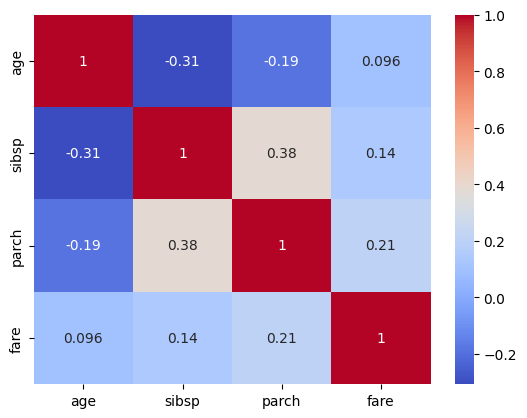

In [100]:
sns.heatmap(titanic_corr_matrix, annot = True, cmap = 'coolwarm')

#22. Use a violin plot to visualize the distribution of Fare for survivors vs. non-survivors?

In [101]:
titanic_group = titanic.groupby("survived")["fare"]

In [102]:
titanic_group.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


<ipython-input-103-9517f38d7513>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "survived", y = "fare", data = titanic,


([<matplotlib.axis.XTick at 0x7dadbf16f7d0>,
 [Text(0, 0, 'Did not survived'), Text(1, 0, 'survived')])

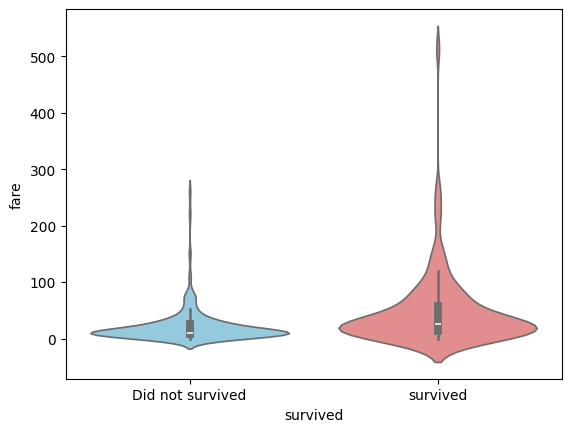

In [103]:
sns.violinplot(x = "survived", y = "fare", data = titanic,
               palette = ['skyblue', 'lightcoral'])
plt.xticks([0,1], ['Did not survived', 'survived'])

#23. Use a swarm plot to analyze the relationship between Pclass, Sex, and survival?

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 80.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 64.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 89.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 79.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


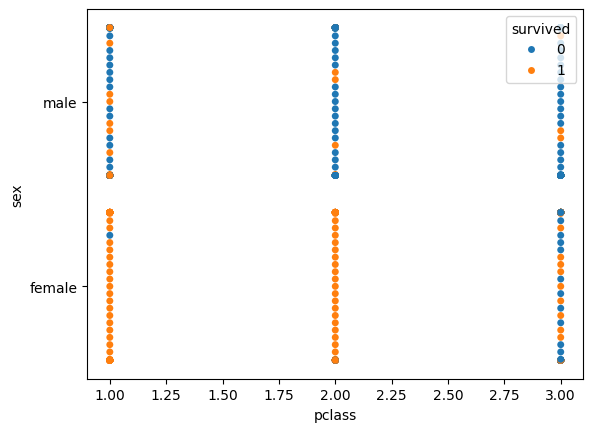

In [104]:

sns.swarmplot(x ='pclass', y= 'sex', hue = 'survived', data = titanic)
plt.legend(title = 'survived', loc = 'upper right')

#25. Use a pair plot to identify patterns between Age, Fare, Pclass, and Survived?

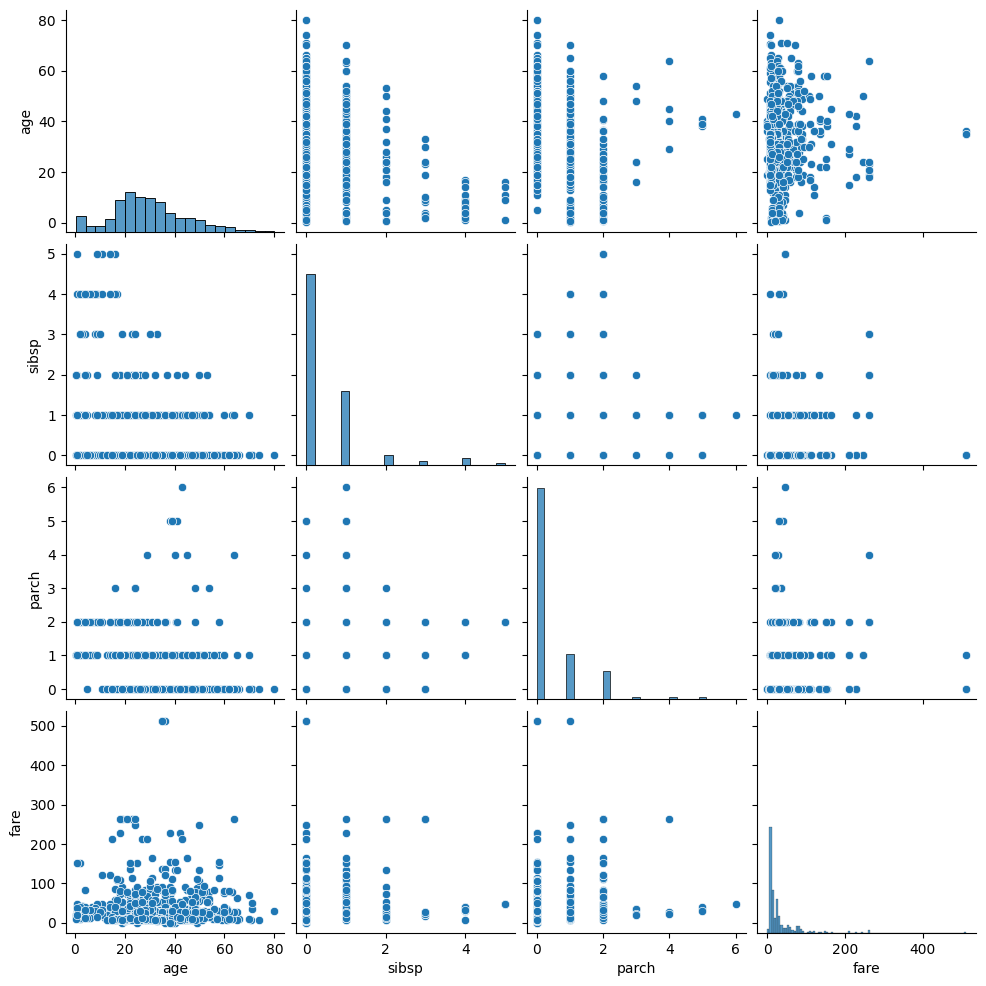

In [105]:
sns.pairplot(titanic_numeric)

#29. Can the dataset be stratified into groups (e.g., age, class, gender) with distinctly high or low survival probabilities?

In [106]:
survival_rate_by_classand_gender = titanic.groupby (['pclass', 'sex'])['survived'].mean().reset_index()

In [107]:
survival_rate_by_classand_gender

,pclass,sex,survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


In [108]:
survival_rate_by_classand_gender.reset_index()

,index,pclass,sex,survived
0,0,1,female,0.968085
1,1,1,male,0.368852
2,2,2,female,0.921053
3,3,2,male,0.157407
4,4,3,female,0.500000
5,5,3,male,0.135447


<Axes: xlabel='pclass', ylabel='survived'>

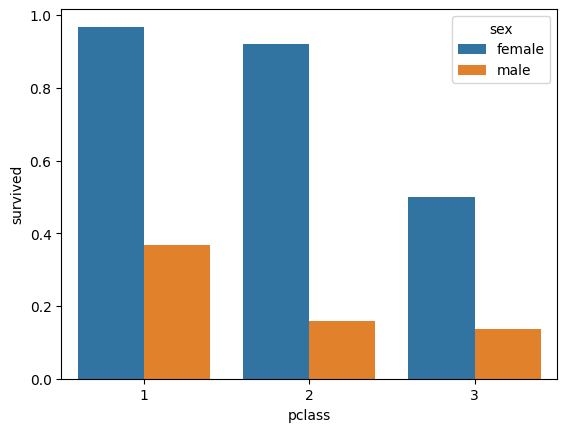

In [109]:
sns.barplot(x = 'pclass', y = 'survived', hue ='sex', data = survival_rate_by_classand_gender)

#30. What trends emerge when visualizing survival rates by age, grouped by gender and passenger class?

<Axes: xlabel='pclass', ylabel='survived'>

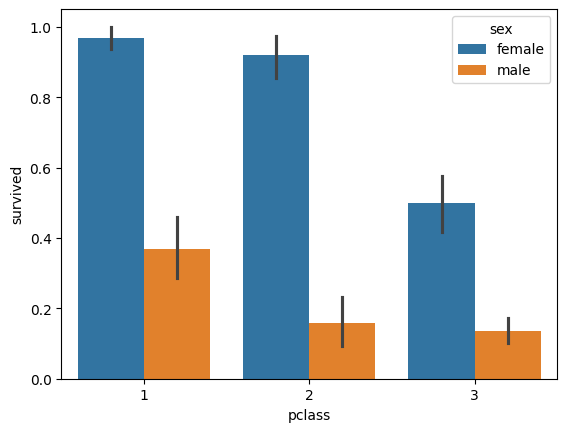

In [110]:
sns.barplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic)